In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
vx = pd.read_csv('virginflights.csv')

vx.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,VX,922,N361VA,SFO,LAX,645,638.0,-7.0,9.0,647.0,80,71.0,54.0,337,741.0,8.0,805,749.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,VX,399,N852VA,JFK,LAX,700,655.0,-5.0,18.0,713.0,385,392.0,360.0,2475,1013.0,14.0,1025,1027.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,VX,897,N845VA,LAS,SFO,700,659.0,-1.0,13.0,712.0,85,80.0,61.0,414,813.0,6.0,825,819.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,VX,12,N842VA,SFO,JFK,705,702.0,-3.0,10.0,712.0,329,320.0,299.0,2586,1511.0,11.0,1534,1522.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,VX,404,N621VA,LAX,JFK,730,728.0,-2.0,7.0,735.0,320,284.0,268.0,2475,1503.0,9.0,1550,1512.0,-38.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
delays=vx[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

delays['full_count'] = delays.apply(lambda x: x.count(), axis=1)
delays=delays[delays.full_count!=0]
delays.drop('full_count',axis=1,inplace=True)

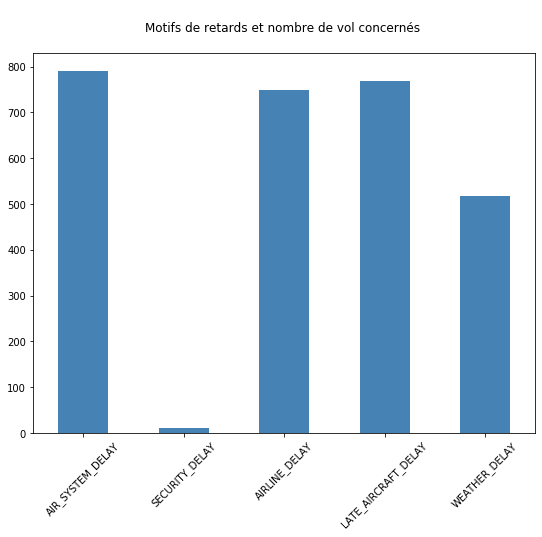

In [6]:
delays.astype(bool).sum(axis=0).plot.bar(figsize=(9,7),color=['steelblue'])
plt.title('\nMotifs de retards et nombre de vol concernés \n')
plt.xticks(rotation = 45)
plt.savefig('Motifs_retards.png', bbox_inches='tight')
plt.show()

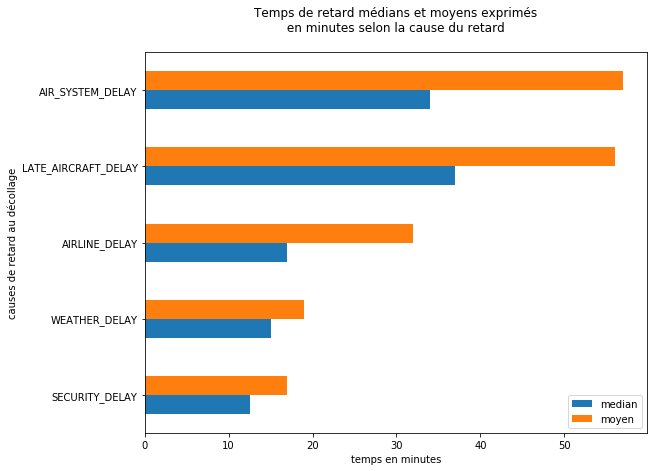

In [7]:
delays1 =delays.replace(0, np.NaN)#.mean()
data = {'cause':[i for i in delays1.columns],
        'median':  [ i for i in delays1.median()],
        'moyen':[round(i,0) for i in delays1.mean()]}

df = pd.DataFrame (data, columns = ['cause','median','moyen'])
df.set_index('cause').sort_values('moyen',ascending=True).plot.barh(figsize=(9,7))
plt.title('Temps de retard médians et moyens exprimés\n en minutes selon la cause du retard \n')
plt.xlabel("temps en minutes")
plt.ylabel('causes de retard au décollage')
plt.savefig('Temps_retards.png', bbox_inches='tight')
plt.show()

In [0]:
vx1= vx[vx.ARRIVAL_DELAY>=15]
vx1['date'] = pd.to_datetime(vx1.YEAR*10000+vx1.MONTH*100+vx1.DAY,format='%Y%m%d')
vx2 = vx1[['ORIGIN_AIRPORT','FLIGHT_NUMBER','ARRIVAL_DELAY','date']]
vx2['cumul']=1
vx2['cumul_retards']=vx2.groupby(['date','ORIGIN_AIRPORT'])['cumul'].cumsum()
vx2.drop('cumul',axis=1,inplace=True)
vx2.cumul_retards=vx2.cumul_retards.map(lambda x : 1 if x>1 else 0)

In [25]:
vx2.head(20)

,ORIGIN_AIRPORT,FLIGHT_NUMBER,ARRIVAL_DELAY,date,cumul_retards
22,SFO,22,46.0,2015-01-01,0
47,DCA,715,71.0,2015-01-01,0
56,EWR,165,18.0,2015-01-01,0
69,DAL,715,56.0,2015-01-01,0
96,LAX,795,16.0,2015-01-01,0
103,SFO,720,53.0,2015-01-01,1
106,SFO,960,18.0,2015-01-01,1
119,JFK,29,42.0,2015-01-01,0
122,BOS,357,23.0,2015-01-01,0
143,SFO,86,77.0,2015-01-01,1


In [24]:
round(vx2.ARRIVAL_DELAY.sum()/vx2.date.nunique())
# nombre de minutes de retard cumulées
# nombre de jours étudiés
# résultat : nombre moyen de minutes de retard cumulées quotidiennement

1770.0